The number of rice in the image is 97


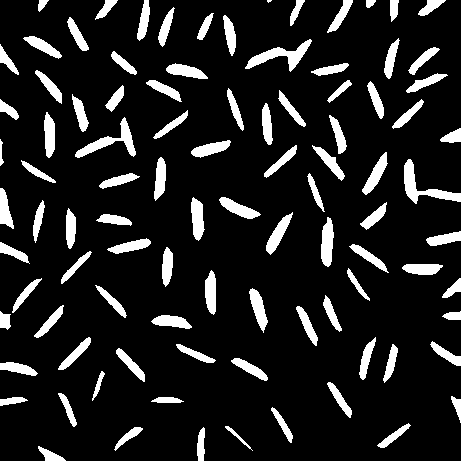

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import filters

img = cv2.imread('data/prj1-2/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png')

# Process on raw image

## Convert image to grayscale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Add MedianFilter to remove salt and pepper noise
gray = cv2.medianBlur(gray, 3)

## Add GaussianFilter to remove noise
gray = cv2.GaussianBlur(gray, (11, 11), 0)

## Increase the brightness by 50
gray = cv2.convertScaleAbs(gray, alpha=1, beta=50)

## Apply CLAHE to enhance constrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = clahe.apply(gray)

# Process on binary image

## Convert image to binary image using thresholding with otsu threshold
_, thresh_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


## Apply erosion to deal with sticking object
kernel = np.ones((3, 3), np.uint8)
thresh_image = cv2.morphologyEx(thresh_image, cv2.MORPH_ERODE, kernel, iterations=3)

# Caculate the number of rice using count connectedComponets
num_labels, labels = cv2.connectedComponents(thresh_image)

print(f"The number of rice in the image is {num_labels}")
Image.fromarray(thresh_image)

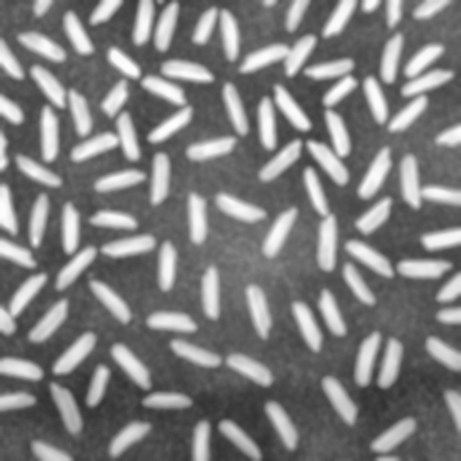

In [52]:
Image.fromarray(gray)

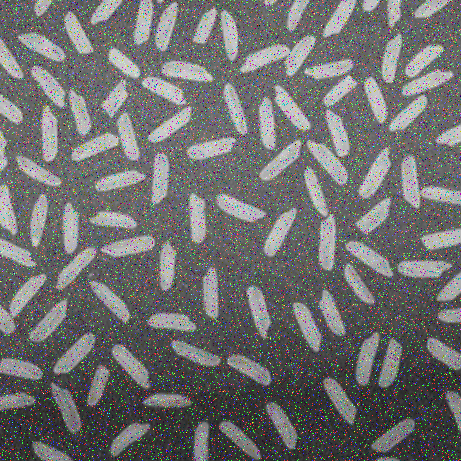

In [75]:
Image.fromarray(img)

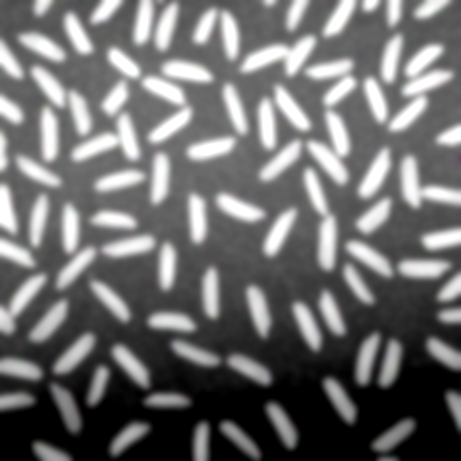

In [65]:
im

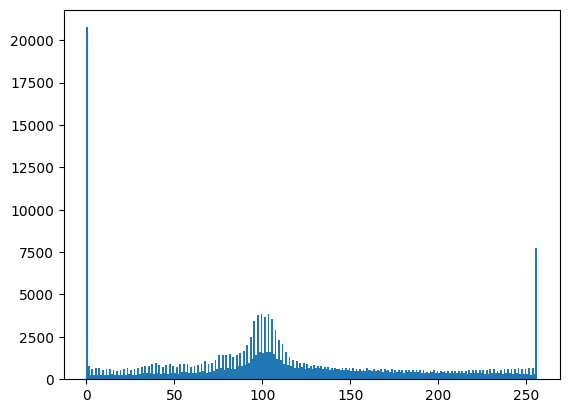

In [67]:
im = ImageOps.grayscale(im)
im = np.array(im)
plt.hist(im.flatten(), 256, [0, 256])
plt.show()

In [70]:
from skimage import filters
thres = filters.threshold_otsu(np.array(im))
thres

134

In [69]:
thres

134